In [3]:
# Validate the data
#from mlflow.artifacts import download_artifacts
import pandas as pd

def pd_read_parquet_from_mlflow(
    #run_id: str, 
    artifact_path: str) -> pd.DataFrame:
    """Load a parquet file from an mlflow artifact.

    Args:
        run_id: the mlflow Run ID
        artifact_path: the relative (to the run) path to the parquet file
    
    Returns:
        pd.DataFrame of the loaded artifact
    """
    #local_path = download_artifacts(run_id=run_id, artifact_path=artifact_path)
    return pd.read_parquet(artifact_path)

#run_id = 'c65b6c792ff240d9a2a415dbca52e4e2'
# path = 'data.parquet'
# df = pd_read_parquet_from_mlflow(path)
# df.head()
path = 'data (1).parquet'
df = pd_read_parquet_from_mlflow(path)
df.head()

user_id                      ts  \
0  us-east-1:1b087523-b47b-421c-97c4-74da80564598 2018-09-25 18:17:26.647   
1  us-east-1:ea986d8e-e87d-458b-a798-1999fbbff05b 2018-09-26 17:13:52.394   
2  us-east-1:8dfca9b6-22b6-4155-8a70-ce3e1211a684 2018-09-27 19:04:15.124   
3  us-east-1:77f43bb4-fe8e-4a50-a4fc-41bc14b11f9d 2018-10-01 22:01:32.622   
4  us-east-1:4940dfa3-1c01-49f2-9cdd-029291d7b7a8 2018-10-05 21:08:52.441   

   active_time_m7  active_time_m14  active_time_s7  active_time_s14  \
0             NaN              NaN             NaN              NaN   
1             NaN              NaN             NaN              NaN   
2             NaN              NaN             NaN              NaN   
3             NaN              NaN             NaN              NaN   
4             NaN              NaN             NaN              NaN   

   activity_percent_m7  activity_percent_m14  activity_percent_s7  \
0                  NaN                   NaN                  NaN   
1                  NaN                   NaN                  NaN   
2                  NaN                   NaN                  NaN   
3                  NaN                   NaN                  NaN   
4                  NaN                   NaN                  NaN   

   activity_percent_s14  ...  phq_q4  phq_q5  phq_q6  phq_q7  phq_q8  phq_q9  \
0                   NaN  ...     2.0     0.0     1.0     1.0     1.0     NaN   
1                   NaN  ...     3.0     3.0     3.0     3.0     3.0     NaN   
2                   NaN  ...     3.0     3.0     3.0     3.0     1.0     NaN   
3                   NaN  ...     2.0     1.0     2.0     2.0     0.0     NaN   
4                   NaN  ...     2.0     3.0     3.0     1.0     0.0     NaN   

   phq2_total  phq8_total  phq9_total    deployment  
0         3.0         9.0         NaN  hr-rct-cue-1  
1         4.0        21.0         NaN  hr-rct-cue-1  
2         6.0        22.0         NaN  hr-rct-cue-1  
3         2.0        10.0         NaN  hr-rct-cue-1  
4         6.0        18.0         NaN  hr-rct-cue-1  

[5 rows x 158 columns]

In [4]:
df = df[df.deployment == 'hr-ascent-1']
df.shape

(2924, 158)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

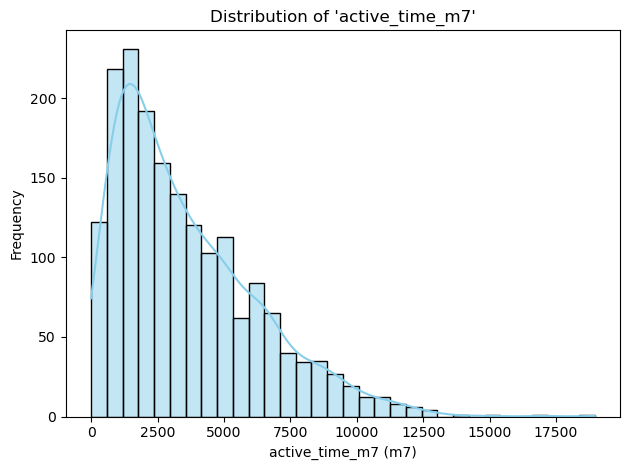

In [6]:
sns.histplot(df['active_time_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'active_time_m7'")
plt.xlabel('active_time_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

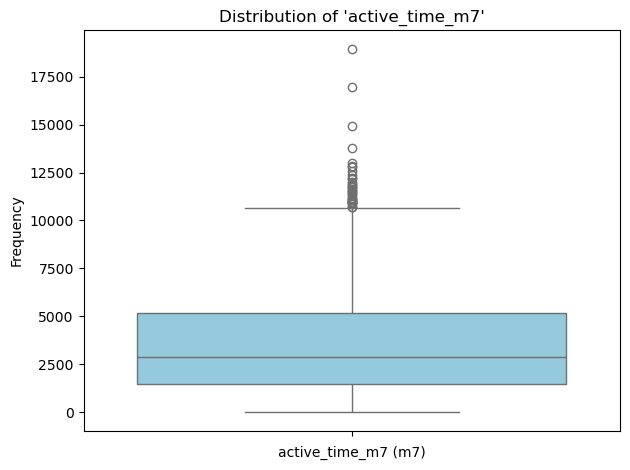

In [7]:
sns.boxplot(df['active_time_m7'].dropna(), color='skyblue')
plt.title("Distribution of 'active_time_m7'")
plt.xlabel('active_time_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
df.active_time_m7.describe()

count     1810.000000
mean      3585.581441
std       2697.679435
min          0.000000
25%       1473.500000
50%       2891.071428
75%       5168.571429
max      18960.000000
Name: active_time_m7, dtype: float64

1. Right Skewness: Both the statistical summary (mean > median) and the distribution plot confirm the data is right-skewed. In the distribution plot, most bars are concentrated toward the left side, creating a long right tail. The long tail is where the data is said to be skewed to. This indicates that while most individuals have lower average daily walking times, a smaller number have significantly higher times.

2. Main Peak and Frequency: Based on the histogram, the data has a right skew where the distribution is more concentrated at the lower end of the walking time range. A lot of data has below 2500.

1. Most people don't move a lot: The biggest bar is on the left side of the chart, meaning lots of people have low "active_time_m7" values. Most move for shorter time of the day.

1. Few People Walk Alot: As we go to the right, towards higher "active_time_m7" values, the bars get smaller. That means fewer and fewer people have really high average walking times. It gets rare to find someone who walks multiple hours per day, every day.

1. Some People Are Sedentary: This chart says that there are a group of people who do not do walk at all.

### Real-life Conclusions:

1. The "average" can be misleading: This graph shows that the average (mean) may not accurately represent the walking habits of most people, because the data is positively skewed. The small number of very active people may skew the average upward. So, it would be best to measure people with smaller "active_time_m7".

2. There's a wide range of activity levels: The long tail on the right side tells us that there's a huge difference in how much different people move during the day, because there is some people with high "active_time_m7".

In [9]:
df.active_time_m7.isna()

0        True
1        True
2        True
3        True
4        True
        ...  
2919    False
2920     True
2921    False
2922     True
2923     True
Name: active_time_m7, Length: 2924, dtype: bool

In [10]:
def clean_ethnicity(x):
    if not isinstance(x, (list, np.ndarray)):
        return None
    if len(x) < 2:
        return str(x[0])
    return 'Multiple'

df.ethnicity.apply(clean_ethnicity).astype(str)

0                           Asian
1                           Asian
2                           White
3                        Multiple
4       Black_Or_African_American
                  ...            
2919                        White
2920                        White
2921                        White
2922                        White
2923    Black_Or_African_American
Name: ethnicity, Length: 2924, dtype: object

In [11]:
df['age_bucket']


0       45-54
1       18-24
2       45-54
3       35-44
4       25-34
        ...  
2919    35-44
2920    65-74
2921    35-44
2922    25-34
2923    45-54
Name: age_bucket, Length: 2924, dtype: string

In [12]:
def classify_phq(score):
    if 0 <= score <= 4:
        return 'Minimal Depression'
    elif 5 <= score <= 9:
        return 'Mild Depression'
    elif 10 <= score <= 14:
        return 'Moderate Depression'
    elif 15 <= score <= 19:
        return 'Moderately Severe Depression'
    elif 20 <= score <= 27:
        return 'Severe Depression'
    else:
        return 'Invalid Score'
def clean_ethnicity(x):
    if not isinstance(x, (list, np.ndarray)):
        return None
    if len(x) < 2:
        return str(x[0])
    return 'Multiple'

def classify_ethnicity(ethnicity_val):
    if ethnicity_val == 'White':
        return True
   # elif ethnicity_val == 'None':
    #    return 'Declined'
    else:
        return False

'''def major_depressive_disorder(score):
    if 0 <= score <= 14:
        return False
    elif 15 <= score <= 27:
        return True
    else:
        return 'Invalid Disorder '''


# Apply the classification function to the phq_total column
df['ethnicity_white'] =df.ethnicity.apply(clean_ethnicity).astype(str).apply(classify_ethnicity)

# Apply the classification function to the phq_total column
df['phq_category'] = df['phq9_total'].apply(classify_phq)

# Apply the classification function to the phq_total column
#df['major_depressive_disorder'] = df['phq9_total'].apply(major_depressive_disorder)


# Specify the category order for phq_category
category_order = ['Minimal Depression', 'Mild Depression', 'Moderate Depression', 'Moderately Severe Depression', 'Severe Depression']
df['phq_category'] = pd.Categorical(df['phq_category'], categories=category_order, ordered=True)

In [13]:
data =  ['active_time_m7', 'age_bucket', 'phq_category', 'ethnicity_white', 'gender', 'phq9_total',] # 'major_depressive_disorder']
df_clean= df[data].dropna(subset=data)
df_clean.head()

active_time_m7 age_bucket         phq_category  ethnicity_white gender  \
56     1731.428571      45-54    Severe Depression            False  Woman   
71     4870.714286      18-24    Severe Depression            False  Woman   
79     9025.714286      35-44    Severe Depression            False  Woman   
84     2565.428571      35-44   Minimal Depression             True  Woman   
88     6077.142857      18-24  Moderate Depression             True    Man   

    phq9_total  
56        21.0  
71        21.0  
79        22.0  
84         0.0  
88        12.0

In [14]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example list of age buckets (ensure these exist in your DataFrame)
age_buckets = ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

# Create a Plotly figure
fig = go.Figure()

# For each age bucket, filter the DataFrame and compute ECDF
for bucket in age_buckets:
    # Filter the DataFrame for the current age bucket
    sub_df = df[df['age_bucket'] == bucket]

    # If there are rows in this subgroup, compute and plot the ECDF
    if len(sub_df) > 0:
        # Drop any NaNs in active_time_m7
        values = sub_df['active_time_m7'].dropna()

        # Compute the ECDF using statsmodels
        ecdf = ECDF(values)
        
        # ecdf.x are the sorted data points, ecdf.y are the cumulative probabilities
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a line trace to the figure for this age bucket
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=bucket
            )
        )

# Update layout to set titles and legends
fig.update_layout(
    title='ECDF of active_time_m7 by Age Bucket',
    xaxis_title='active_time_m7',
    yaxis_title='Proportion (ECDF)',
    legend_title='Age Bucket'
)

fig.show()


In [15]:
df.deployment.value_counts()

deployment
hr-ascent-1    2924
Name: count, dtype: int64

In [16]:
df['active_time_m7'].notna().sum()

1810

In [17]:
df['active_time_m7'].isna().sum()

1114

In [18]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of active_time_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in active_time_m7
        values = sub_df['active_time_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of active_time_m7 by {grouping_var}",
        xaxis_title="active_time_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


In [19]:
#Final code 
import statsmodels.formula.api as smf

def get_binary_age(age_bucket: str):
    if '85' in age_bucket:
        return 'old'
    ub = int(age_bucket.strip().split('-')[-1])
    if ub < 45:
        return 'young'
    return 'old'

df['age_binary'] = df.age_bucket.apply(lambda x: None if pd.isnull(x) else get_binary_age(x))

def analyze(inf: str, target: str, df: pd.DataFrame):
    df_clean = df.dropna(subset=[inf, target, 'sex', 'age_binary'])
    # Drop 'Other' because data is so small.
    df_clean = df_clean[df_clean.sex != 'Other']
    df_clean['sex'] = df_clean.sex.astype(str)
    df_clean['age_binary'] = df_clean.age_binary.astype(str)
    
    # Fit the linear regression model
    model = smf.ols(formula=f'{target} ~ {inf} : C(sex) : C(age_binary)', data=df_clean).fit()

    # Display the summary of the model
    return model.summary()


print(analyze('active_time_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.561
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           4.87e-06
Time:                        12:44:42   Log-Likelihood:                -5791.8
No. Observations:                1810   AIC:                         1.159e+04
Df Residuals:                    1805   BIC:                         1.162e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [20]:
print(analyze('step_count_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.237
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           8.85e-06
Time:                        12:44:42   Log-Likelihood:                -5792.5
No. Observations:                1810   AIC:                         1.159e+04
Df Residuals:                    1805   BIC:                         1.162e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

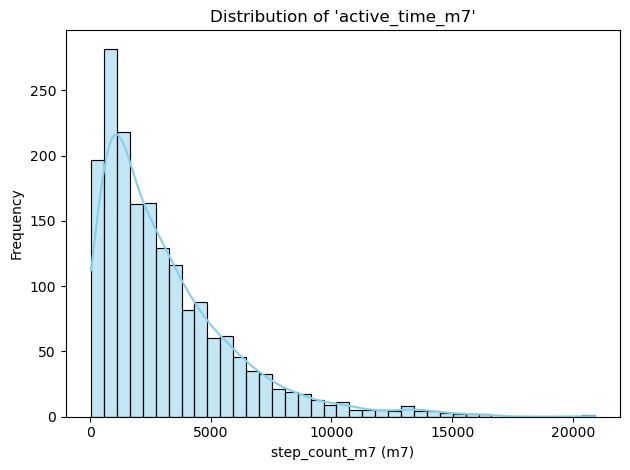

In [21]:
sns.histplot(df['step_count_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'active_time_m7'")
plt.xlabel('step_count_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. R-squared:                       0.016
2. Adj. R-squared:                  0.014
3. F-statistic:                     7.561

Now going to p-values of model which predicts phq8_total

In [22]:
df.phq8_total

0       23.0
1       19.0
2       12.0
3       21.0
4        7.0
        ... 
2919     9.0
2920     7.0
2921    19.0
2922     9.0
2923    20.0
Name: phq8_total, Length: 2924, dtype: float64

walking_rate_m7

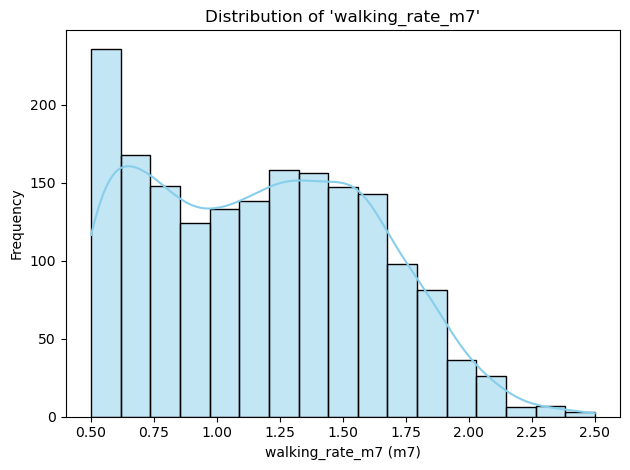

In [23]:
sns.histplot(df['walking_rate_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'walking_rate_m7'")
plt.xlabel('walking_rate_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
print(analyze('walking_rate_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.120
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.73e-06
Time:                        12:44:42   Log-Likelihood:                -5784.6
No. Observations:                1808   AIC:                         1.158e+04
Df Residuals:                    1803   BIC:                         1.161e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [25]:
df.walking_rate_m7

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2919    1.403810
2920         NaN
2921    0.947188
2922         NaN
2923         NaN
Name: walking_rate_m7, Length: 2924, dtype: float64

device_use_percent_m7

In [26]:
df.loc[df['device_use_percent_m7'] > 0.22, ['device_use_percent_m7', 'user_id']]


device_use_percent_m7                                         user_id
79                 0.425020  us-east-1:db841a21-c4b2-c6b9-91ed-370b2da2aa86
84                 0.241572  us-east-1:db841a21-c41f-cdf0-a318-973e38f0b767
90                 0.872668  us-east-1:db841a21-c40e-ca56-d651-8007780a9ef0
117                0.684700  us-east-1:db841a21-c494-cf20-c1f5-ddec795b01a3
121                0.269001  us-east-1:db841a21-c42e-c9ae-0e93-38b537edc422
...                     ...                                             ...
2910               0.489060  us-east-1:db841a21-c492-c0eb-a894-64efda6db1c6
2912               0.395936  us-east-1:db841a21-c469-c7f1-a7dd-c5e17573544d
2913               0.452743  us-east-1:db841a21-c434-cebe-ce63-1fcf294c8420
2915               0.315109  us-east-1:db841a21-c475-c44e-18ef-55341f28bdbc
2916               0.305373  us-east-1:db841a21-c44e-c4db-5ac4-b1e1a69c7ffa

[599 rows x 2 columns]

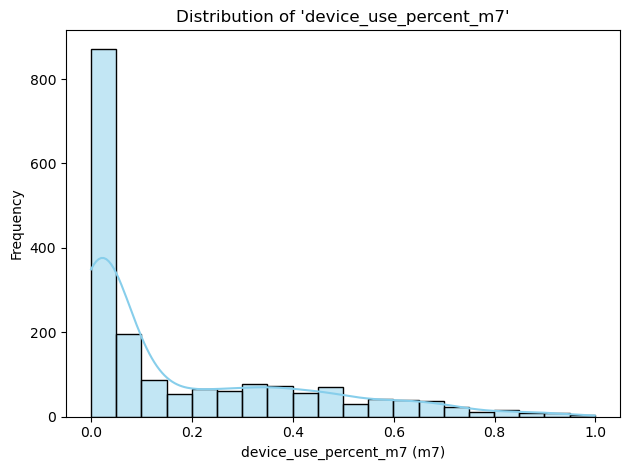

In [27]:
sns.histplot(df['device_use_percent_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'device_use_percent_m7'")
plt.xlabel('device_use_percent_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of device_use_percent_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in device_use_percent_m7
        values = sub_df['device_use_percent_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of device_use_percent_m7 by {grouping_var}",
        xaxis_title="device_use_percent_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


In [29]:
print(analyze('device_use_percent_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.431
Date:                Wed, 26 Feb 2025   Prob (F-statistic):            0.00839
Time:                        12:44:43   Log-Likelihood:                -5872.1
No. Observations:                1828   AIC:                         1.175e+04
Df Residuals:                    1823   BIC:                         1.178e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

6. **sleep_routine_index_m7**

In [30]:
df['sleep_routine_index_m7']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2919    0.890956
2920         NaN
2921         NaN
2922         NaN
2923    0.815311
Name: sleep_routine_index_m7, Length: 2924, dtype: float64

In [31]:
print(analyze('sleep_routine_index_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     19.42
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.11e-15
Time:                        12:44:43   Log-Likelihood:                -6247.9
No. Observations:                1965   AIC:                         1.251e+04
Df Residuals:                    1960   BIC:                         1.253e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [32]:
df.loc[df['sleep_routine_index_m7'] > 0.87, ['sleep_routine_index_m7', 'user_id']]


sleep_routine_index_m7                                         user_id
79                  0.870370  us-east-1:db841a21-c4b2-c6b9-91ed-370b2da2aa86
82                  0.928406  us-east-1:db841a21-c46a-c6fd-ca13-1faabac2c46d
88                  0.952340  us-east-1:db841a21-c420-c4ad-0a48-50742d3f72bb
96                  0.894775  us-east-1:db841a21-c42f-c6ec-693c-36da2d0b4241
100                 0.891948  us-east-1:db841a21-c461-c94a-62d2-412b4d42d028
...                      ...                                             ...
2888                0.897553  us-east-1:db841a21-c45c-cea4-81fd-bd8fbf339370
2897                0.875992  us-east-1:db841a21-c419-c069-8c97-04c23d32f053
2908                0.937004  us-east-1:db841a21-c4bd-c65e-9158-66cc2bb13077
2916                0.928241  us-east-1:db841a21-c44e-c4db-5ac4-b1e1a69c7ffa
2919                0.890956  us-east-1:db841a21-c47e-cfab-1ebe-8283ed8dfd96

[622 rows x 2 columns]

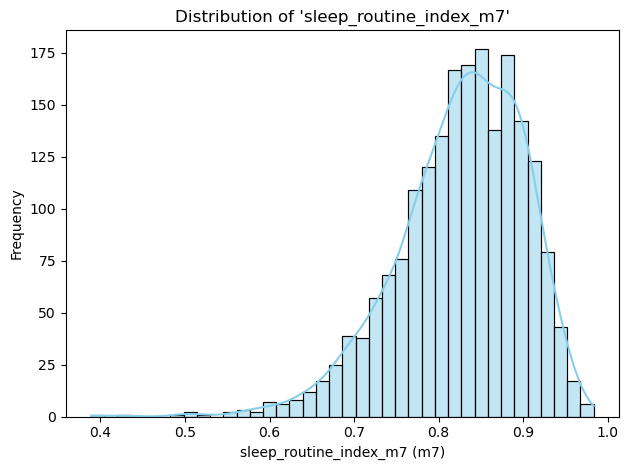

In [33]:
sns.histplot(df['sleep_routine_index_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'sleep_routine_index_m7'")
plt.xlabel('sleep_routine_index_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [34]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of sleep_routine_index_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in sleep_routine_index_m7
        values = sub_df['sleep_routine_index_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of sleep_routine_index_m7 by {grouping_var}",
        xaxis_title="sleep_routine_index_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


sleep_duration_m7

In [35]:
df[df['sleep_duration_m7']!=None]['sleep_duration_m7']
#df.loc[df['sleep_routine_index_m7'] > 0.87, ['sleep_routine_index_m7', 'user_id']]


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2919   NaN
2920   NaN
2921   NaN
2922   NaN
2923   NaN
Name: sleep_duration_m7, Length: 2924, dtype: float64

In [36]:
df.sleep_duration_m7.notnull().value_counts()

sleep_duration_m7
False    2133
True      791
Name: count, dtype: int64

In [37]:
df.loc[df['sleep_duration_m7'].notna(),['sleep_duration_m7','user_id']]
# df.loc[df['sleep_routine_index_m7'] > 0.87, ['sleep_routine_index_m7', 'user_id']] 
# user_id = us-east-1:db841a21-c41f-cdf0-a318-973e38f0b767 , sleep_routine: 28500.000000




sleep_duration_m7                                         user_id
71         17700.000000  us-east-1:db841a21-c48b-cd1c-563f-eb23aa6c2768
82         24857.142857  us-east-1:db841a21-c46a-c6fd-ca13-1faabac2c46d
84         28500.000000  us-east-1:db841a21-c41f-cdf0-a318-973e38f0b767
97         21128.571429  us-east-1:db841a21-c44b-c0d1-d14f-45303e5fc49e
101        19457.142857  us-east-1:db841a21-c4fe-c774-d462-71566b97501e
...                 ...                                             ...
2899       24642.857143  us-east-1:db841a21-c4dc-c172-134c-8469cd89458a
2902       31414.285714  us-east-1:db841a21-c414-c2f5-37b0-e0836c7d2c38
2909       23442.857143  us-east-1:db841a21-c408-cf7e-bc70-6a90bc7247a6
2912       24300.000000  us-east-1:db841a21-c469-c7f1-a7dd-c5e17573544d
2916       19800.000000  us-east-1:db841a21-c44e-c4db-5ac4-b1e1a69c7ffa

[791 rows x 2 columns]

In [38]:
print(analyze('sleep_duration_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.585
Date:                Wed, 26 Feb 2025   Prob (F-statistic):            0.00115
Time:                        12:44:43   Log-Likelihood:                -2544.6
No. Observations:                 791   AIC:                             5099.
Df Residuals:                     786   BIC:                             5122.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

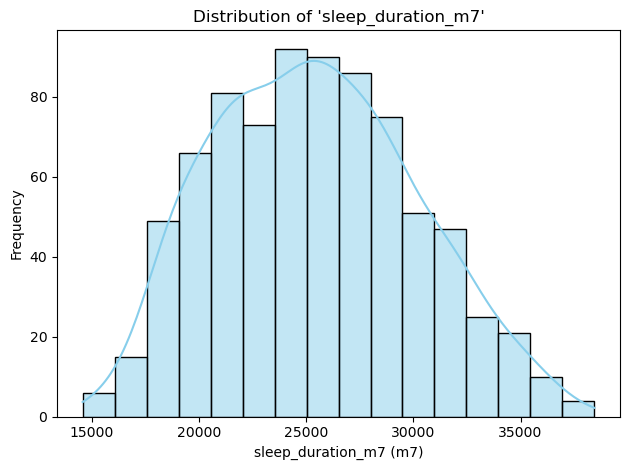

In [39]:
sns.histplot(df['sleep_duration_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'sleep_duration_m7'")
plt.xlabel('sleep_duration_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of sleep_duration_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in sleep_duration_m7
        values = sub_df['sleep_duration_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of sleep_duration_m7 by {grouping_var}",
        xaxis_title="sleep_duration_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


loc_entropy_m7

In [41]:
df.loc_entropy_m7

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2919    3.236046
2920    0.631780
2921    0.206646
2922    0.010089
2923    1.247130
Name: loc_entropy_m7, Length: 2924, dtype: float64

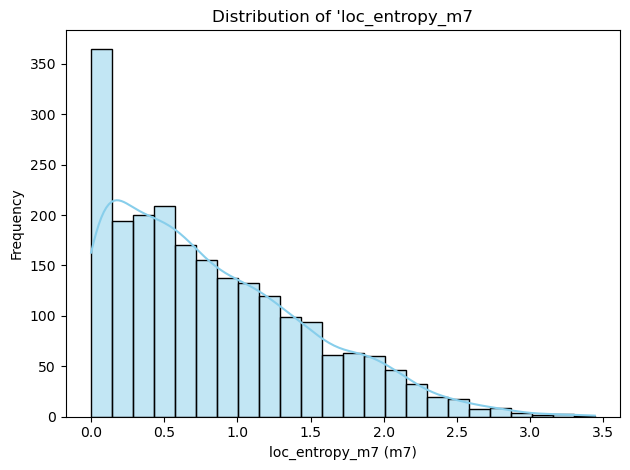

In [42]:
sns.histplot(df['loc_entropy_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'loc_entropy_m7")
plt.xlabel('loc_entropy_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [43]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of loc_entropy_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in loc_entropy_m7
        values = sub_df['loc_entropy_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of loc_entropy_m7 by {grouping_var}",
        xaxis_title="loc_entropy_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


In [44]:
df['loc_entropy_m7'].describe()

count    2202.000000
mean        0.828339
std         0.669118
min         0.000000
25%         0.280429
50%         0.682122
75%         1.248273
max         3.441424
Name: loc_entropy_m7, dtype: float64

In [45]:
print(analyze('loc_entropy_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.691
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           0.000903
Time:                        12:44:44   Log-Likelihood:                -7009.7
No. Observations:                2202   AIC:                         1.403e+04
Df Residuals:                    2197   BIC:                         1.406e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## time_at_home_m7

In [46]:
df.time_at_home_m7.describe()

count      2003.000000
mean      55607.477965
std       26396.192763
min           0.000000
25%       37468.308071
50%       62019.484428
75%       78078.908976
max      168167.874999
Name: time_at_home_m7, dtype: float64

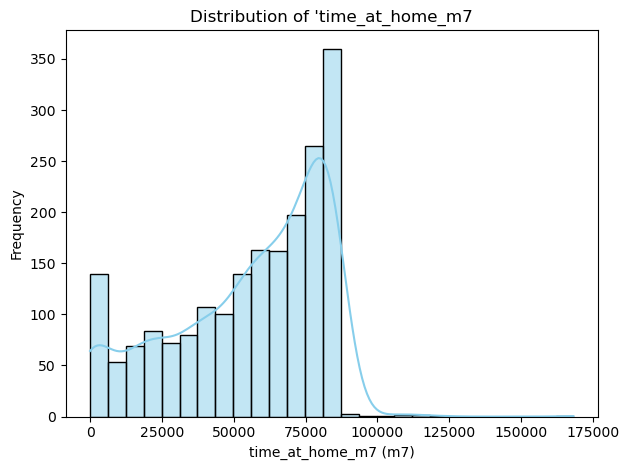

In [47]:
sns.histplot(df['time_at_home_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'time_at_home_m7")
plt.xlabel('time_at_home_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [48]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of time_at_home_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in time_at_home_m7
        values = sub_df['time_at_home_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of time_at_home_m7 by {grouping_var}",
        xaxis_title="time_at_home_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


In [49]:
print(analyze('time_at_home_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     11.97
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.30e-09
Time:                        12:44:44   Log-Likelihood:                -6356.1
No. Observations:                2003   AIC:                         1.272e+04
Df Residuals:                    1998   BIC:                         1.275e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

## num_location_clusters_m7


df['num_location_clusters']

In [50]:
df['num_location_clusters_m7']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2919    105.571429
2920      3.000000
2921      4.285714
2922      2.000000
2923     47.000000
Name: num_location_clusters_m7, Length: 2924, dtype: float64

In [51]:
print(analyze('num_location_clusters_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.814
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           0.000724
Time:                        12:44:44   Log-Likelihood:                -7009.5
No. Observations:                2202   AIC:                         1.403e+04
Df Residuals:                    2197   BIC:                         1.406e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

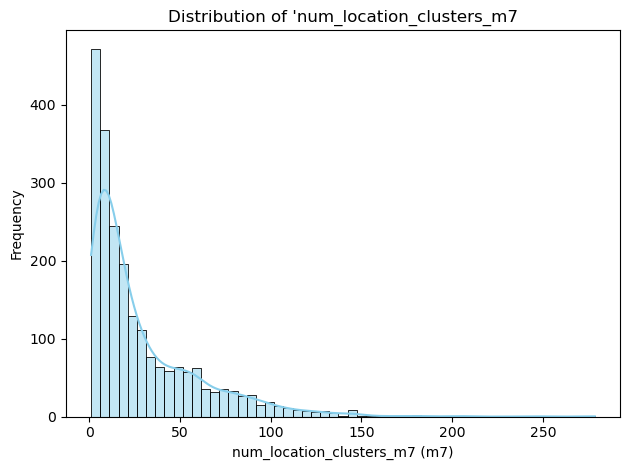

In [52]:
sns.histplot(df['num_location_clusters_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'num_location_clusters_m7")
plt.xlabel('num_location_clusters_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [53]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of num_location_clusters_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in time_at_honum_location_clusters_m7me_m7
        values = sub_df['num_location_clusters_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of num_location_clusters_m7 by {grouping_var}",
        xaxis_title="num_location_clusters_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


## Car_data.csv

car_df = pd.read

In [54]:
car_df = pd.read_csv('Cars_data.csv')
car_df

Make       Model  Year                Engine_Fuel_Type  Engine_HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine_Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market_Category Vehicle_Size  Vehicle_Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway_MPG  city_mpg  Popularity   MSRP  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [55]:
car_df.Engine_Fuel_Type


0           premium unleaded (required)
1           premium unleaded (required)
2           premium unleaded (required)
3           premium unleaded (required)
4           premium unleaded (required)
                      ...              
11909       premium unleaded (required)
11910       premium unleaded (required)
11911       premium unleaded (required)
11912    premium unleaded (recommended)
11913                  regular unleaded
Name: Engine_Fuel_Type, Length: 11914, dtype: object

In [56]:
#Final code 
import statsmodels.formula.api as smf



def analyze(inf: str, target: str, df: pd.DataFrame):
    df_clean = df.dropna(subset=[inf, target])

    
    # Fit the linear regression model
    model = smf.ols(formula=f'{target} ~ {inf}', data=df_clean).fit()

    # Display the summary of the model
    return model.summary()




In [57]:
print(analyze('Engine_Fuel_Type', 'MSRP', car_df))

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     425.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:44:44   Log-Likelihood:            -1.4631e+05
No. Observations:               11911   AIC:                         2.926e+05
Df Residuals:                   11901   BIC:                         2.927e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [58]:
mod_df = pd.read_csv('Churn_Modelling.csv')
mod_df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [59]:
mod_df.EstimatedSalary

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [60]:
print(analyze('Age', 'EstimatedSalary', mod_df))

                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5185
Date:                Wed, 26 Feb 2025   Prob (F-statistic):              0.472
Time:                        12:44:44   Log-Likelihood:            -1.2379e+05
No. Observations:               10000   AIC:                         2.476e+05
Df Residuals:                    9998   BIC:                         2.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.016e+05   2210.581     45.973      0.0

In [91]:
df.age_bucket

0       45-54
1       18-24
2       45-54
3       35-44
4       25-34
        ...  
2919    35-44
2920    65-74
2921    35-44
2922    25-34
2923    45-54
Name: age_bucket, Length: 2924, dtype: string

In [127]:
X = df[df["time_at_home_m7"].notna()][["time_at_home_m7",'sex', 'age_bucket']]
y= df[["phq8_total"]]

In [128]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler(with_mean=False, with_std=True)
scaler

StandardScaler(with_mean=False)

In [129]:
X_Scaled = scaler.fit_transform(X[['time_at_home_m7']])
X_Scaled= pd.DataFrame(X_Scaled)
X_Scaled

0
0     1.845755
1     2.702936
2     1.646663
3     2.930323
4     2.905276
...        ...
1998  1.371506
1999  2.895157
2000  0.133607
2001  2.897689
2002  3.252450

[2003 rows x 1 columns]

In [130]:
df_scaled = pd.concat([X, X_Scaled, y], axis=1)
df_scaled

time_at_home_m7     sex age_bucket         0  phq8_total
56       48708.742479  Female      45-54  0.930473        21.0
71       71329.410570  Female      18-24  1.884667        20.0
79       43454.791774  Female      35-44  2.233414        21.0
82       77330.047999  Female      45-54  1.851113         7.0
84       76669.081570  Female      35-44  0.842635         0.0
...               ...     ...        ...       ...         ...
2910              NaN    <NA>       <NA>       NaN        13.0
2914              NaN    <NA>       <NA>       NaN        20.0
2917              NaN    <NA>       <NA>       NaN         6.0
2920              NaN    <NA>       <NA>       NaN         7.0
2923              NaN    <NA>       <NA>       NaN        20.0

[2924 rows x 5 columns]

In [131]:
df_scaled = df_scaled[(df_scaled[0].notna()) & (df_scaled['time_at_home_m7'].notna())]
df_scaled


time_at_home_m7     sex age_bucket         0  phq8_total
56       48708.742479  Female      45-54  0.930473        21.0
71       71329.410570  Female      18-24  1.884667        20.0
79       43454.791774  Female      35-44  2.233414        21.0
82       77330.047999  Female      45-54  1.851113         7.0
84       76669.081570  Female      35-44  0.842635         0.0
...               ...     ...        ...       ...         ...
1996     75441.412570  Female      35-44  0.461789         9.0
1997     68820.071142  Female      35-44  0.000000        12.0
1998     71152.590856  Female      45-54  1.371506         5.0
1999     79557.612856  Female      35-44  2.895157        17.0
2002     75628.081428  Female      25-34  3.252450        24.0

[1303 rows x 5 columns]

In [132]:
df_scaled.describe()
df_scaled.columns


Index(['time_at_home_m7', 'sex', 'age_bucket', 0, 'phq8_total'], dtype='object')

In [133]:
df_scaled.rename(columns={0:'scaled_time_at_home_m7'}, inplace=True)

/var/folders/j2/xnk4x4h10w7f7rt6gztjqvtm0000gq/T/ipykernel_3079/3082001299.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
df_scaled.columns

Index(['time_at_home_m7', 'sex', 'age_bucket', 'scaled_time_at_home_m7',
       'phq8_total'],
      dtype='object')

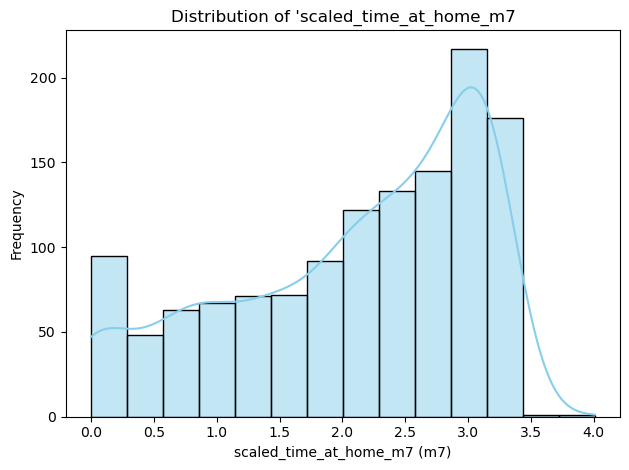

In [111]:
sns.histplot(df_scaled['scaled_time_at_home_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'scaled_time_at_home_m7")
plt.xlabel('scaled_time_at_home_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

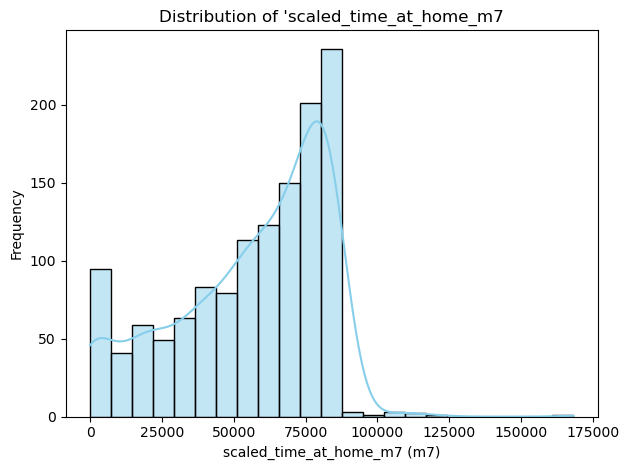

In [112]:
sns.histplot(df_scaled['time_at_home_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'scaled_time_at_home_m7")
plt.xlabel('scaled_time_at_home_m7 (m7)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [135]:
df_scaled = df_scaled.drop(columns=['time_at_home_m7'], axis=1)
df_scaled.columns

Index(['sex', 'age_bucket', 'scaled_time_at_home_m7', 'phq8_total'], dtype='object')

In [136]:
df_scaled

sex age_bucket  scaled_time_at_home_m7  phq8_total
56    Female      45-54                0.930473        21.0
71    Female      18-24                1.884667        20.0
79    Female      35-44                2.233414        21.0
82    Female      45-54                1.851113         7.0
84    Female      35-44                0.842635         0.0
...      ...        ...                     ...         ...
1996  Female      35-44                0.461789         9.0
1997  Female      35-44                0.000000        12.0
1998  Female      45-54                1.371506         5.0
1999  Female      35-44                2.895157        17.0
2002  Female      25-34                3.252450        24.0

[1303 rows x 4 columns]

In [120]:
#Final code 
import statsmodels.formula.api as smf

def get_binary_age(age_bucket: str):
    if '85' in age_bucket:
        return 'old'
    ub = int(age_bucket.strip().split('-')[-1])
    if ub < 45:
        return 'young'
    return 'old'


def analyze(inf: str, target: str, df: pd.DataFrame):
    df['age_binary'] = df.age_bucket.apply(lambda x: None if pd.isnull(x) else get_binary_age(x))
    df_clean = df.dropna(subset=[inf, target, 'sex', 'age_binary'])
    # Drop 'Other' because data is so small.
    df_clean = df_clean[df_clean.sex != 'Other']
    df_clean['sex'] = df_clean.sex.astype(str)
    df_clean['age_binary'] = df_clean.age_binary.astype(str)
    
    # Fit the linear regression model
    model = smf.ols(formula=f'{target} ~ {inf} : C(sex) : C(age_binary)', data=df_clean).fit()

    # Display the summary of the model
    return model.summary()




In [137]:
analyze('scaled_time_at_home_m7','phq8_total',df_scaled)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             phq8_total   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     5.236
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           0.000348
Time:                        13:14:31   Log-Likelihood:                -4127.7
No. Observations:                1303   AIC:                             8265.
Df Residuals:                    1298   BIC:                             8291.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     13.1782      0.371     35.511      0.000      12.450      13.906
scaled_time_at_home_m7:C(sex)[Female]:C(age_binary)[old]      -0.1851      0.184     -1.003      0.316      -0.547       0.177
scaled_time_at_home_m7:C(sex)[Male]:C(age_binary)[old]        -0.8429      0.286     -2.947      0.003      -1.404      -0.282
scaled_time_at_home_m7:C(sex)[Female]:C(age_binary)[young]     0.1854      0.177      1.046      0.296      -0.162       0.533
scaled_time_at_home_m7:C(sex)[Male]:C(age_binary)[young]      -0.4725      0.255     -1.852      0.064      -0.973       0.028
==============================================================================
Omnibus:                       68.486   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.485
Skew:                          -0.052   Prob(JB):                     1.08e-06
Kurtosis:                       2.296   Cond. No.                         5.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
analyze('time_at_home_m7','phq8_total',df_scaled)

/var/folders/j2/xnk4x4h10w7f7rt6gztjqvtm0000gq/T/ipykernel_3079/4195040815.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             phq8_total   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     8.301
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.31e-06
Time:                        13:10:45   Log-Likelihood:                -4121.7
No. Observations:                1303   AIC:                             8253.
Df Residuals:                    1298   BIC:                             8279.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                              11.8971      0.373     31.880      0.000      11.165      12.629
time_at_home_m7:C(sex)[Female]:C(age_binary)[old]    1.223e-05    6.7e-06      1.825      0.068   -9.14e-07    2.54e-05
time_at_home_m7:C(sex)[Male]:C(age_binary)[old]     -1.192e-05   1.03e-05     -1.162      0.245    -3.2e-05     8.2e-06
time_at_home_m7:C(sex)[Female]:C(age_binary)[young]   3.15e-05   6.89e-06      4.574      0.000     1.8e-05     4.5e-05
time_at_home_m7:C(sex)[Male]:C(age_binary)[young]    1.896e-05   9.76e-06      1.944      0.052   -1.74e-07    3.81e-05
==============================================================================
Omnibus:                       73.778   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.403
Skew:                          -0.083   Prob(JB):                     4.12e-07
Kurtosis:                       2.283   Cond. No.                     9.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""